### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Load data
Lets consider a usecase where we have to predict students test outcome i.e., pass (1) or fail(0) based on hours studied.

In this case the outcome to be predicted is discrete.

In [2]:
# Load data
df = pd.read_csv('Data/Grade_Set_1_Classification.csv')

print df

   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1


### Fit linear regression

To classify the observation into Pass or Fail (1 or 0), lets build a linear regression and try to use a threshold i.e. anything over some value is pass, else fail

R Squared :  0.675
Mean Absolute Error:  0.22962962963
Root Mean Squared Error:  0.268741924943


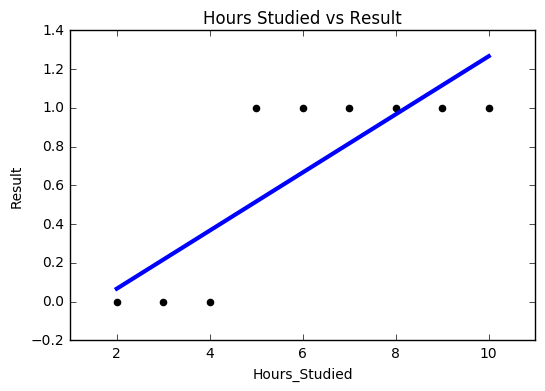

In [3]:
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Result                       # dependent variable 

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

# add predict value to the data frame
df['Result_Pred'] = lr.predict(x)

# Using built-in function
print "R Squared : ", r2_score(df.Result, df.Result_Pred)
print "Mean Absolute Error: ", mean_absolute_error(df.Result, df.Result_Pred)
print "Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Result, df.Result_Pred))

### Logistic Regression

The outcome that we are expecting is either 1 or 0, the issue with linear regression is that it can give values large than 1 or less than 0. In the above plot we can see that linear regression is not able to draw boundries to classify observations. 

The solution to this is to introduce sigmoid or ligit function (which takes a S shape) to the regression equatoin. The fundamental idea here is the hypothesis will use the linear approximation, then map with logistic function for binary prediction.

linear regression equation in this case is y = mx + c

Logistic regression can be explained better in odds ration. The odds of an event occuring are defined as the probability of an event occuring divided by the probability of that event not occuring. 

odds ratio of pass vs fail = probability(y=1) / 1-probability(y=1)

A logit is the log base e (log) of the odds, so using logit model:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

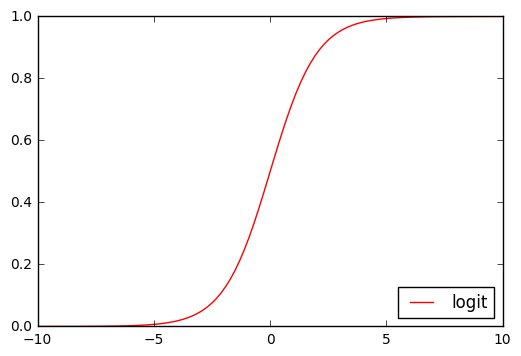

In [4]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

The probability of pass is p = .66 and fail is f = 1 - p = .33

The odds of pass and the odds of fail are reciprocals of one another, i.e., 1/2 = .5 and 1/.5 = 2

Now we can use the probabilities to compute the odds of pass and fail,
odds(pass) = p/(1-p) or p/f = .66/.33 = 2
odds(fail) = (1-p)/p or f/p = .33/.66 = .5

Next, we compute the odds ratio for ,
Odds Ration = 2/.5 = 4

Thus the odds of being pass grows 4 times larger with every unit increase in hours studied

[ 0.38623098  0.49994056  0.61365629  0.71619252  0.80036836  0.86430823
  0.91006991  0.94144416  0.96232587]
[0 0 1 1 1 1 1 1 1]


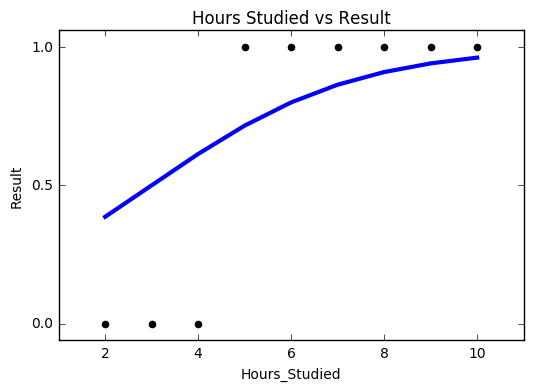

In [5]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]       # independent variable
y = df['Result']                      # dependent variable 

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

# predict_proba will return array containing proability of y = 0 and y = 1
print model.predict_proba(x)[:,1]

# predict will give convert the probability(y=1) values > .5 to 1 else 0  
print model.predict(x)

# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

In [6]:
from sklearn import metrics

# generate evaluation metrics
print "Accuracy :", metrics.accuracy_score(y, model.predict(x))
print "AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1])

print "Confusion matrix :",metrics.confusion_matrix(y, model.predict(x))
print "classification report :", metrics.classification_report(y, model.predict(x))

Accuracy : 0.888888888889
AUC : 1.0
Confusion matrix : [[2 1]
 [0 6]]
classification report :              precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       0.86      1.00      0.92         6

avg / total       0.90      0.89      0.88         9



### Plot ROC curve

ROC AUC: 1.00


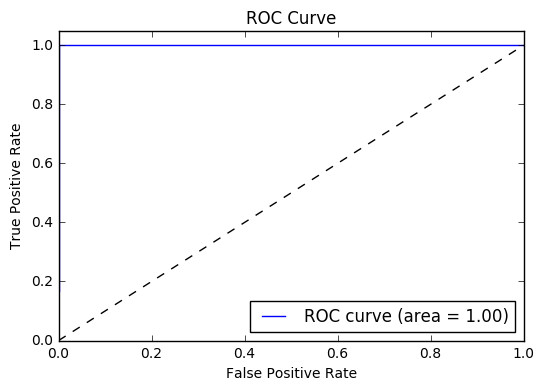

In [7]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
 
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression Diagnostics

Inverse of regularization (C is float, default value is 1) is one of the key aspect of fitting logistic regression line.

C = 1 (default), Accuracy : 0.888888888889
C = 10, Accuracy : 1.0
C = 100, Accuracy : 1.0
C = 1000, Accuracy : 1.0


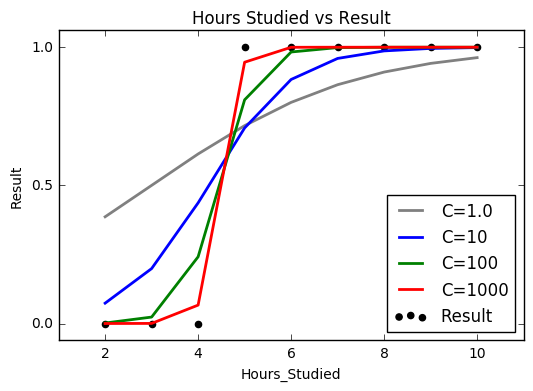

In [8]:
# instantiate a logistic regression model with default c value, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
print "C = 1 (default), Accuracy :", metrics.accuracy_score(y, model.predict(x))

# instantiate a logistic regression model with c = 10, and fit with X and y
model1 = LogisticRegression(C=10)
model1 = model1.fit(x, y)

# check the accuracy on the training set
print "C = 10, Accuracy :", metrics.accuracy_score(y, model1.predict(x))

# instantiate a logistic regression model with c = 100, and fit with X and y
model2 = LogisticRegression(C=100)
model2 = model2.fit(x, y)

# check the accuracy on the training set
print "C = 100, Accuracy :", metrics.accuracy_score(y, model2.predict(x))

# instantiate a logistic regression model with c = 1000, and fit with X and y
model3 = LogisticRegression(C=1000)
model3 = model3.fit(x, y)

# check the accuracy on the training set
print "C = 1000, Accuracy :", metrics.accuracy_score(y, model3.predict(x))


# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black', label='Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='gray', linewidth=2, label='C=1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color='blue', linewidth=2,label='C=10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color='green', linewidth=2,label='C=100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color='red', linewidth=2,label='C=1000')
plt.legend(loc='lower right') # legend location
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()